In [2]:
# %markdown

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['figure.facecolor'] = 'w'
import warnings
warnings.filterwarnings('ignore')

In [3]:
from decodanda import *
np.random.seed(1123)

SyntaxError: invalid syntax (utilities.py, line 1193)



### First example: neurons respond to one variable
In this example, we have a simple scenario where neurons respond to a single binary variable that can take two values. We will try to decode these two values from neural activity.


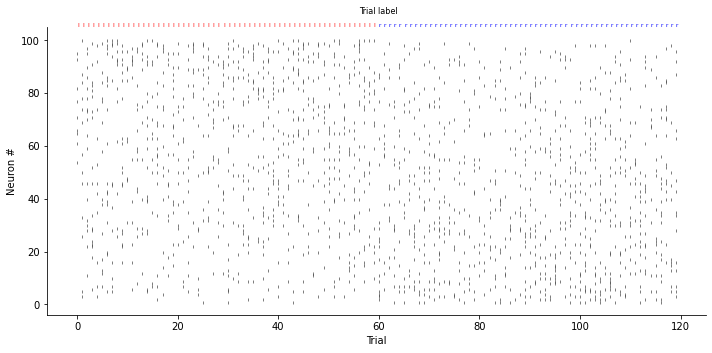

In [15]:
# let's create some data that responds to a binary variable

activity, labels = generate_AB_activity(n_neurons=100, n_trials=120, separation=1.5, labelA='l', labelB='r')

visualize_AB_activity(labels, activity)

session_0 = {
    'Neural Data': activity,
    'Position': labels,
    'Trial Number': np.arange(len(labels))     # specifying that each vector is an independent trial that we can use for decoding
}


In [16]:
# Create a decodanda object by applying these conditions to the data

decodanda_params = {
    'neural_attr': 'Neural Data',       # the key to get the neural activity
    'trial_attr': 'Trial Number',   # the key for the trial number to be used in cross validation
    'verbose': True
}

mydec = Decodanda(data=session_0,
                  conditions={
                      'Position': ['l', 'r']     # The conditions dictionary takes a simple one-variable list here.
                  },
                  **decodanda_params)

		[Decodanda]	building conditioned rasters for session 0
			(Position = l):	Selected 60 time bin out of 120, divided into 60 trials 
			(Position = r):	Selected 60 time bin out of 120, divided into 60 trials 




#### The decode() method

 40%|████      | 4/10 [00:00<00:00, 39.57it/s]


Testing decoding performance for semantic dichotomy:  Position

[decode_dichotomy]	Decoding - 60 time bins - 100 neurons - 1 brains
		(r)
			vs.
		(l)

Looping over decoding cross validation folds:

[decode_with_nullmodel]	 data <p> = 0.72

[decode_with_nullmodel]	Looping over null model shuffles.


100%|██████████| 10/10 [00:00<00:00, 41.34it/s]


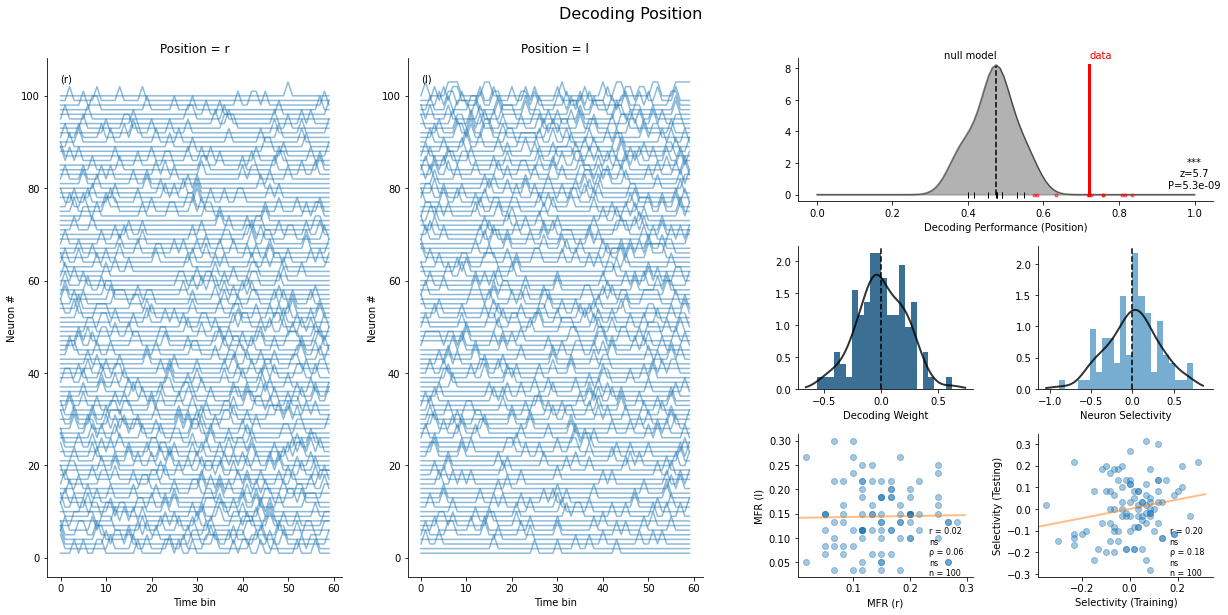

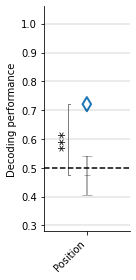

In [17]:
decoding_params = {
    'training_fraction': 0.7,       # fraction of trials used for training during cross validation
    'cross_validations': 10,        # number of different training-testing separations
    'nshuffles': 10,                # number of null model repetitions to compute significance
    'plot': True,                   # this generates a recap plot with performance, null model bars, and significance
    'plot_all': True                # this generates a large plot with a few visualizations of the data and of the results
}

data, null = mydec.decode(**decoding_params)


